In [28]:
import pandas as pd

In [29]:
location = pd.read_csv('/Users/ahmedaldossary/Documents/Crop_Project/agriculture-crop-production/data/world_country_and_usa_states_latitude_and_longitude_values.csv')
continent = pd.read_csv('/Users/ahmedaldossary/Documents/Crop_Project/agriculture-crop-production/data/continents2.csv')

In [48]:
location[location["country"] == "China, mainland"]

,latitude,longitude,country


In [41]:
continent[continent["country"] == "China, mainland"]

,country,alpha-3,region
45,"China, mainland",CHN,Asia


In [42]:
location = location.iloc[:,[1,2,3]]
continent = continent.iloc[:,[0,2,5]]

IndexError: positional indexers are out-of-bounds

In [43]:
continent.rename(columns={"name":"country"},inplace=True)

/var/folders/yn/r1t3820x6kj1hrnkz_9b21s80000gn/T/ipykernel_81235/3351636466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent.rename(columns={"name":"country"},inplace=True)


In [44]:
df1 = pd.merge(location,continent, how="left", on="country")

In [46]:
df2 = df1[df1["region"] == "Asia"]
# df2.to_csv('location.csv')
df2

,latitude,longitude,country,alpha-3,region
1,23.424076,53.847818,United Arab Emirates,ARE,Asia
2,33.939110,67.709953,Afghanistan,AFG,Asia
6,40.069099,45.038189,Armenia,ARM,Asia
15,40.143105,47.576927,Azerbaijan,AZE,Asia
18,23.684994,90.356331,Bangladesh,BGD,Asia
22,25.930414,50.637772,Bahrain,BHR,Asia
30,27.514162,90.433601,Bhutan,BTN,Asia
51,35.126413,33.429859,Cyprus,CYP,Asia
75,42.315407,43.356892,Georgia,GEO,Asia
92,22.396428,114.109497,Hong Kong,HKG,Asia


In [9]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inLine

In [11]:
location_map = gpd.read_file("/Users/ahmedaldossary/Documents/Crop_Project/agriculture-crop-production/data/location.csv")

In [13]:
df = pd.read_csv("/Users/ahmedaldossary/Documents/Crop_Project/agriculture-crop-production/data/location.csv")
crs = {"init": "epsg:4326"}
df.head()

,Unnamed: 0,latitude,longitude,country,alpha-3,region
0,1,23.424076,53.847818,United Arab Emirates,ARE,Asia
1,2,33.939110,67.709953,Afghanistan,AFG,Asia
2,6,40.069099,45.038189,Armenia,ARM,Asia
3,15,40.143105,47.576927,Azerbaijan,AZE,Asia
4,18,23.684994,90.356331,Bangladesh,BGD,Asia


In [14]:
geometry = [Point(xy) for xy in zip( df["longitude"], df["latitude"])]
geometry[:3]

[<POINT (53.848 23.424)>, <POINT (67.71 33.939)>, <POINT (45.038 40.069)>]

In [17]:
gdf = gpd.GeoDataFrame(df,
                          crs = crs,
                          geometry = geometry)
gdf.head()
gdf.to_csv('gdf.csv')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


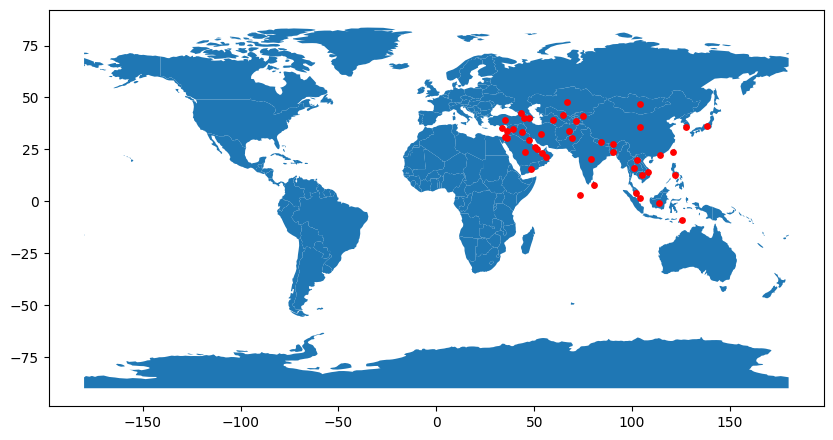

In [16]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);